** CLTV Prediction 
* VahanBima is one of the leading insurance companies in India. It provides motor vehicle insurances at best prices with 24/7 claim settlement.  It offers different types of policies for  both personal and commercial vehicles. It has established its brand across different regions in India. 

** Problem Statement
* Around 90% of the businesses today use personalized services. The company wants to launch different personalized experience programs for customers of VahanBima. The personalized experience can be dedicated resources for claim settlement, different kinds of services at doorstep, etc. Inorder to do so, they would like to segment the customers into different tiers based on their customer lifetime value (CLTV).
* Inorder to do it, they would like to predict the customer lifetime value based on the activity and interaction of the customer with the platform. So, we have to build a high performance and interpretable machine learning model to predict the CLTV based on the user and policy data.

## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest,f_regression

## Loading the dataset

In [2]:
train_data=pd.read_csv('/Users/Lovely_Ray/Desktop/data science/Jobathon Jan23/train.csv')
test_data=pd.read_csv('/Users/Lovely_Ray/Desktop/data science/Jobathon Jan23/test.csv')

## Data Pre-processing

In [3]:
train_data.head(10)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
5,6,Male,Rural,High School,More than 10L,1,1,0,1,C,Gold,348768
6,7,Female,Rural,Bachelor,5L-10L,1,6,0,More than 1,A,Gold,238920
7,8,Female,Urban,High School,5L-10L,0,0,5473,More than 1,A,Silver,64128
8,9,Female,Urban,High School,5L-10L,1,3,6105,More than 1,A,Gold,94536
9,10,Male,Rural,High School,More than 10L,1,6,0,More than 1,A,Platinum,99060


In [4]:
#data shape
train_data.shape

(89392, 12)

In [5]:
#data type
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [6]:
#checking for null values
train_data.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [7]:
#checking for duplicate values
train_data.duplicated().sum()

0

In [8]:
#finding the number of unique values of each colimn
train_data.nunique()

id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

In [9]:
#identifying the range of the columns
train_data.agg([min,max]).T

,min,max
id,1,89392
gender,Female,Male
area,Rural,Urban
qualification,Bachelor,Others
income,2L-5L,More than 10L
marital_status,0,1
vintage,0,8
claim_amount,0,31894
num_policies,1,More than 1
policy,A,C


In [10]:
#Statistical summary of the data
train_data.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


## Exploratory Data Analysis

### Numerical/Continuous variable analysis

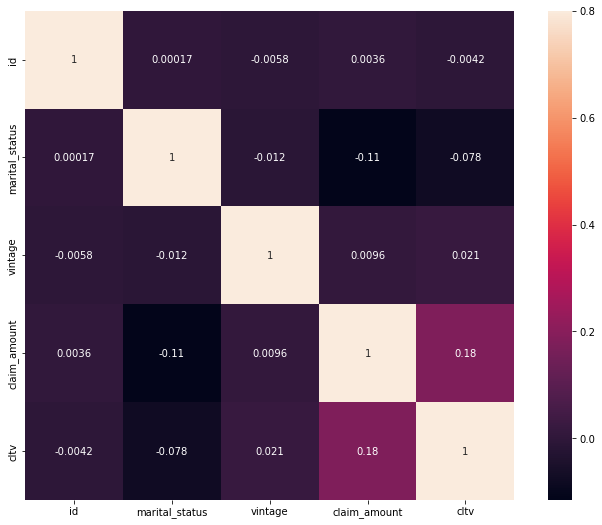

In [11]:
# Heatmap to see correlation between continuos independent variables with the target variable(Customer Lifetime Value)
correlation = train_data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(correlation, vmax = .8, square = True, annot = True)
plt.show()

  customer lifetime value is positively correlated with claim amount and vintage.

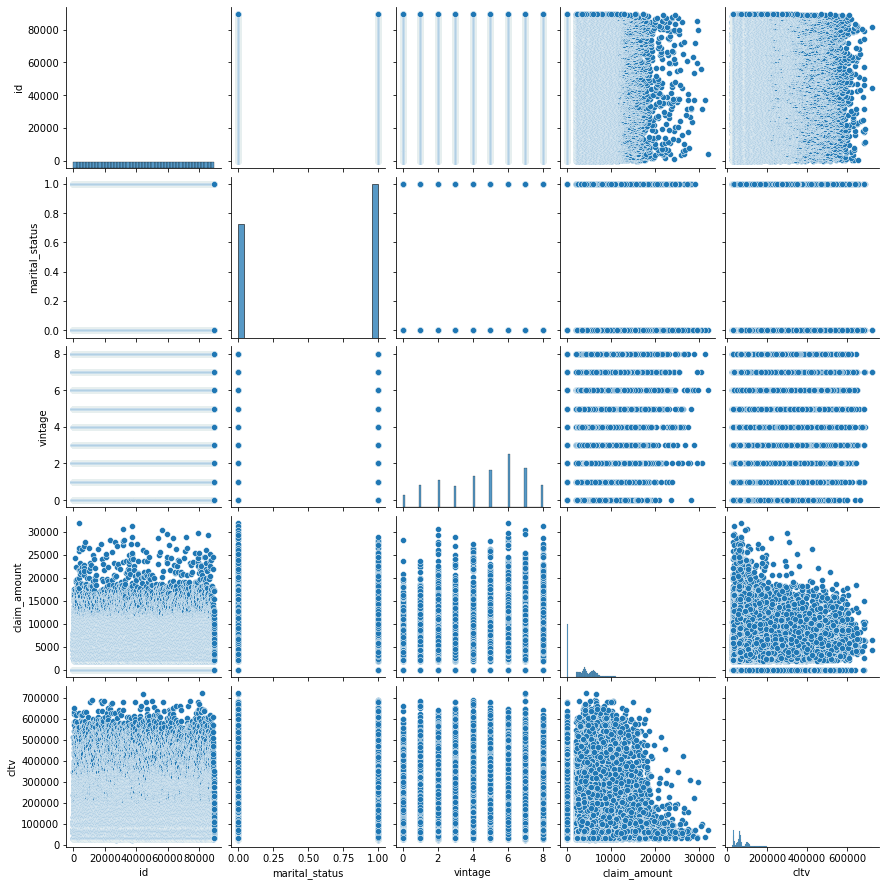

In [12]:
sns.pairplot(train_data)

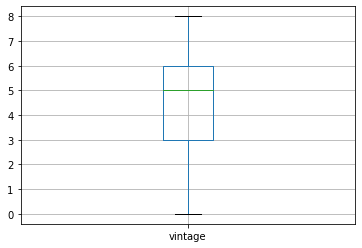

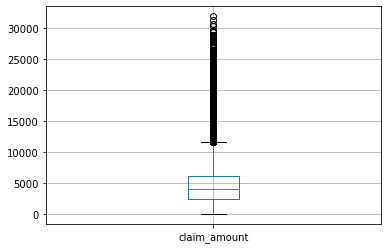

In [13]:
numerical_columns = ['vintage', 'claim_amount']
for column in numerical_columns:
    train_data.boxplot(column)
    plt.show()

* We can notice outliers in the 'claim_amount' column. since claim amount will vary for each customer, hence it cannot be treated an outlier. so we will be keeping them as it is.

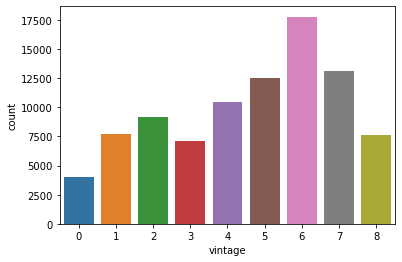

In [148]:
sns.countplot(x='vintage',data=train_data)
plt.show()

<AxesSubplot:xlabel='claim_amount', ylabel='Count'>

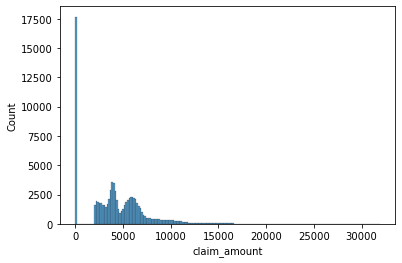

In [14]:
sns.histplot(train_data['claim_amount'])

### Analysis of Claim amount

In [15]:
train_data['claim_amount'].describe()

count    89392.000000
mean      4351.502416
std       3262.359775
min          0.000000
25%       2406.000000
50%       4089.000000
75%       6094.000000
max      31894.000000
Name: claim_amount, dtype: float64

Text(0.5, 0, 'claim_amount')

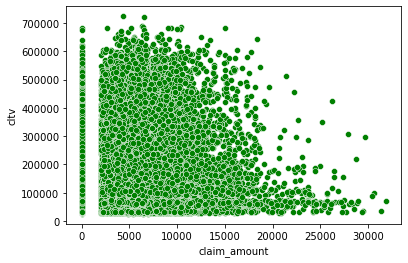

In [16]:
ax = sns.scatterplot(x='claim_amount', y='cltv', color= 'green', data=train_data)
ax.set_xlabel('claim_amount')

### Categorical variables analysis

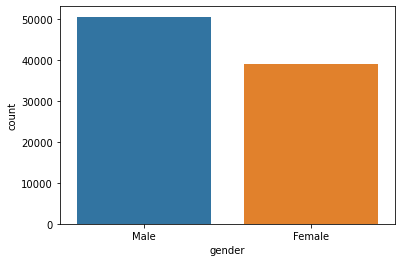

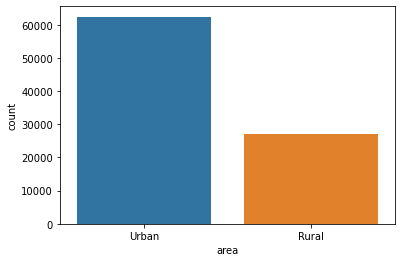

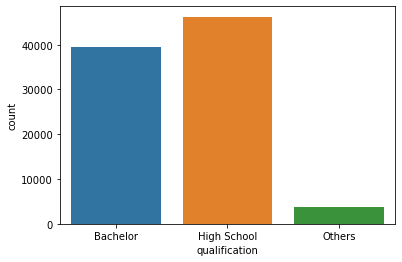

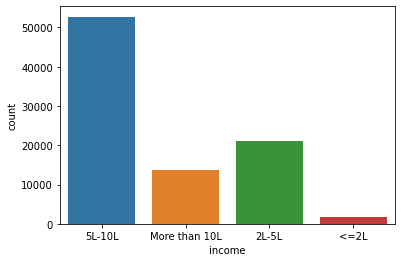

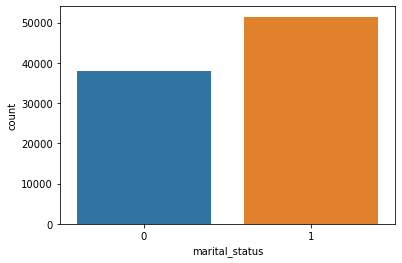

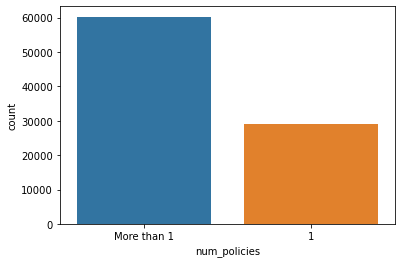

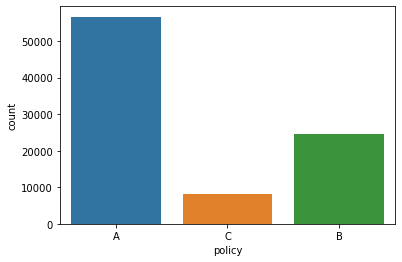

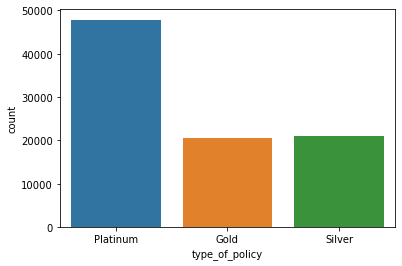

[None, None, None, None, None, None, None, None]

In [17]:
categorical_columns = ['gender', 'area', 'qualification','income','marital_status','num_policies','policy','type_of_policy']
def gen_countplots(column, train_data=train_data):
    sns.countplot(x=column, data=train_data);
    plt.show();

[gen_countplots(column) for column in categorical_columns]

** Data insights
* Very few difference in the number of male and female customers.
* Most of the customers belong to urban area.
* Almost all the customers are at least high school passouts.
* the income range shows that nearly 70% customers earn more than 5 L.
* At least half of the total customers are married.
* Most of the customers have more than 1 policy.
* More than half of the total customers hold platinum policy.

### Encoding the categorical features

In [18]:
train_data.replace({'gender':{'Male':0,'Female':1}},inplace=True)
train_data.replace({'area':{'Urban':1,'Rural':0}},inplace=True)
train_data.replace({'qualification':{'Bachelor':1,'High School':2,'Others':3}},inplace=True)
train_data.replace({'income':{'<=2L':1,'2L-5L':2,'5L-10L':3,'More than 10L':4}},inplace=True)
train_data.replace({'num_policies':{'1':0,'More than 1':1}},inplace=True)
train_data.replace({'policy':{'A':1,'B':2,'C':3}},inplace=True)
train_data.replace({'type_of_policy':{'Platinum':1,'Gold':2,'Silver':3}},inplace=True)

In [19]:
train_data.sample(10)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
34166,34167,0,0,1,4,1,6,2585,1,1,1,93648
77539,77540,0,0,1,2,1,2,2819,1,2,2,71784
20629,20630,0,0,1,2,0,8,3038,1,2,3,63156
86713,86714,1,0,2,3,0,6,0,1,1,3,158724
82990,82991,1,1,2,3,1,6,6417,0,1,1,49596
63355,63356,0,1,2,3,0,4,5880,1,1,1,424560
12219,12220,1,1,3,3,0,4,6401,1,1,2,68940
46564,46565,1,1,1,2,0,2,10952,1,2,1,104448
13731,13732,0,0,2,3,0,4,9762,1,1,1,311016
3242,3243,0,0,1,3,0,5,0,1,1,3,93468


## Splitting the dataset into training and test data

In [20]:
#splitting the dataset
X=train_data.drop(columns='cltv',axis=1)
Y=train_data['cltv']

In [21]:
X.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1,0,1,1,3,1,5,5790,1,1,1
1,2,0,0,2,3,0,8,5080,1,1,1
2,3,0,1,1,3,1,8,2599,1,1,1
3,4,1,0,2,3,0,7,0,1,1,1
4,5,0,1,2,4,1,6,3508,1,1,2


In [22]:
Y.head()

0     64308
1    515400
2     64212
3     97920
4     59736
Name: cltv, dtype: int64

## Feature Scaling

In [23]:
#Normalizing the features using standardscaler to bring features on a similar scale. 
sc = StandardScaler()
sc.fit_transform(X)

array([[-1.73203143, -0.87763533,  0.65673628, ...,  0.69524426,
        -0.69733342, -0.84935151],
       [-1.73199268, -0.87763533, -1.52268123, ...,  0.69524426,
        -0.69733342, -0.84935151],
       [-1.73195393, -0.87763533,  0.65673628, ...,  0.69524426,
        -0.69733342, -0.84935151],
       ...,
       [ 1.73195393,  1.13942541,  0.65673628, ...,  0.69524426,
         0.82822956, -0.84935151],
       [ 1.73199268,  1.13942541, -1.52268123, ...,  0.69524426,
         0.82822956, -0.84935151],
       [ 1.73203143,  1.13942541, -1.52268123, ...,  0.69524426,
         0.82822956,  0.36339536]])

## Model Building with Sklearn

In [24]:
#dataset segregated into independent and target variable
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=2)

In [25]:
#checking the shape of independent and target variables
print(X.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(89392, 11) (71513, 11) (17879, 11) (71513,) (17879,)


In [145]:
#checking the first 5 rows of X
X.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1,0,1,1,3,1,5,5790,1,1,1
1,2,0,0,2,3,0,8,5080,1,1,1
2,3,0,1,1,3,1,8,2599,1,1,1
3,4,1,0,2,3,0,7,0,1,1,1
4,5,0,1,2,4,1,6,3508,1,1,2


In [26]:
#buiding different regression models with default parameters
LR = LinearRegression()
rf = RandomForestRegressor(random_state=2)
gb = GradientBoostingRegressor(random_state=2)
dt = DecisionTreeRegressor(random_state=0)

## Model Training

In [27]:
%%time
LR.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
gb.fit(X_train, Y_train)
dt.fit(X_train, Y_train)

CPU times: user 27.1 s, sys: 537 ms, total: 27.7 s
Wall time: 26.7 s


DecisionTreeRegressor(random_state=0)

## prediction on the test data

In [28]:
y_pred_LR=LR.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gb=gb.predict(X_test)
y_pred_dt=dt.predict(X_test)
df1=pd.DataFrame({'Actual':Y_test,'LR':y_pred_LR,'RF':y_pred_rf,
                 'GB':y_pred_gb,'DT':y_pred_dt})

In [29]:
df1

,Actual,LR,RF,GB,DT
71364,60636,61299.434510,49680.48,56713.049568,31212.0
71816,55092,71572.378585,56330.88,63882.248803,66444.0
67426,92232,135544.225055,167755.32,141553.619918,196548.0
76747,67596,51958.071585,50818.68,50361.170637,51816.0
55895,205296,123010.649275,244746.96,124152.442986,105348.0
...,...,...,...,...,...
82990,49596,57285.100113,59352.96,50643.813031,65640.0
34522,29712,54163.096625,45385.20,51569.251488,31428.0
67497,53784,34157.500197,38845.20,43735.560450,37728.0
86964,228396,104108.757867,113464.56,94167.358762,107388.0


## Model evaluation

In [30]:
score1=metrics.r2_score(Y_test,y_pred_LR)
score2=metrics.r2_score(Y_test,y_pred_rf)
score3=metrics.r2_score(Y_test,y_pred_gb)
score4=metrics.r2_score(Y_test,y_pred_dt)
print(score1,score2,score3,score4)

0.149132739332402 0.08150543560154055 0.16052624406216287 -0.820282124654341


 none of the models are giving good R2 score. so will be employing feature engineering

In [31]:
#Adj R2 value
n = 89392
k = 11
Adj_score1=1 - (1 - score1)*(n-1) / (n-k-1)
Adj_score2=1 - (1 - score2)*(n-1) / (n-k-1)
Adj_score3=1 - (1 - score3)*(n-1) / (n-k-1)
Adj_score4=1 - (1 - score4)*(n-1) / (n-k-1)
print(Adj_score1,Adj_score2,Adj_score3,Adj_score4)

0.14902802306626473 0.08139239644056062 0.16042292999508623 -0.8205061468446655


In [32]:
#Calculating MAE
s1=metrics.mean_absolute_error(Y_test,y_pred_LR)
s2=metrics.mean_absolute_error(Y_test,y_pred_rf)
s3=metrics.mean_absolute_error(Y_test,y_pred_gb)
s4=metrics.mean_absolute_error(Y_test,y_pred_dt)
print(s1,s2,s3,s4)

50801.30452576697 53878.982976676554 49832.49535318605 68637.51529727613


  We have attempted to build the above models with all features taken into account to predict CLTV. Now we will employ some feature engineering techniques considering only significant features to predict CLTV.

## Feature Engineering

### RFE(Recursive Feature Elimination)

In [33]:
#Drawing Important features from Gradient Boost model using RFE 
rfe_gb  = RFE(gb, n_features_to_select=None) 

In [34]:
rfe_gb.fit(X,Y)

RFE(estimator=GradientBoostingRegressor(random_state=2))

In [35]:
#Important features as per Gradient Boost model
rfe_gb.get_feature_names_out(input_features=X.columns)

array(['id', 'area', 'claim_amount', 'num_policies', 'policy'],
      dtype=object)

In [36]:
#Drawing Important features from Linear regression model using RFE
rfe_LR  = RFE(LR, n_features_to_select=None)

In [37]:
rfe_LR.fit(X,Y)

RFE(estimator=LinearRegression())

In [38]:
#Important features as per Linear Regression model
rfe_LR.get_feature_names_out(input_features=X.columns)

array(['gender', 'area', 'income', 'marital_status', 'num_policies'],
      dtype=object)

In [39]:
#Drawing Important features from Random Forest model using RFE
rfe_rf  = RFE(rf, n_features_to_select=None)

In [40]:
rfe_rf.fit(X,Y)

RFE(estimator=RandomForestRegressor(random_state=2))

In [41]:
#Important features as per Random Forest model
rfe_rf.get_feature_names_out(input_features=X.columns)

array(['id', 'vintage', 'claim_amount', 'num_policies', 'type_of_policy'],
      dtype=object)

In [42]:
#Drawing Important features from Decision Tree model using RFE
rfe_dt  = RFE(dt, n_features_to_select=None)

In [43]:
rfe_dt.fit(X,Y)

RFE(estimator=DecisionTreeRegressor(random_state=0))

In [44]:
#Important features as per Decision Tree model
rfe_dt.get_feature_names_out(input_features=X.columns)

array(['id', 'vintage', 'claim_amount', 'num_policies', 'type_of_policy'],
      dtype=object)

In [45]:
#Comparing all the features from 4 models in a DataFrame
rfe_df = pd.DataFrame({'Gradient Boost' : rfe_gb.get_feature_names_out(input_features=X.columns),
                       'Linear regression' : rfe_LR.get_feature_names_out(input_features=X.columns),
                      'Random Forest':rfe_rf.get_feature_names_out(input_features=X.columns),
                      'Decision Tree':rfe_dt.get_feature_names_out(input_features=X.columns)})
rfe_df

,Gradient Boost,Linear regression,Random Forest,Decision Tree
0,id,gender,id,id
1,area,area,vintage,vintage
2,claim_amount,income,claim_amount,claim_amount
3,num_policies,marital_status,num_policies,num_policies
4,policy,num_policies,type_of_policy,type_of_policy


### The most recurring features of the above 4 models are as below:
* id
* area
* vintage
* claim_amount
* num_policies
* type of policy

### So Model building based on the above 6 important features

In [46]:
#Selecting only 6 important features for training
X_rfe = train_data.loc[:, ['id', 'area', 'vintage', 'claim_amount','num_policies','type_of_policy']]

In [47]:
X_rfe.shape

(89392, 6)

In [48]:
#Splitting into train & test variables
X_train_rfe, X_test_rfe, Y_train, Y_test = train_test_split(X_rfe, Y, random_state=2, test_size=0.20)

In [49]:
#Size of train & test data
X_train_rfe.shape, X_test_rfe.shape, Y_train.shape, Y_test.shape

((71513, 6), (17879, 6), (71513,), (17879,))

In [50]:
#Building models with default parameters
LR_rfe  = LinearRegression()
gb_rfe= GradientBoostingRegressor(random_state=2)

### RFE based Model training and evaluation

In [51]:
LR_rfe.fit(X_train_rfe,Y_train)
gb_rfe.fit(X_train_rfe,Y_train)

GradientBoostingRegressor(random_state=2)

### model prediction on the test data

In [52]:
y_pred_LR_rfe=LR_rfe.predict(X_test_rfe)
y_pred_gb_rfe=gb_rfe.predict(X_test_rfe)
df2=pd.DataFrame({'Actual':Y_test,
                 'LR_rfe':y_pred_LR_rfe,'gb_rfe':y_pred_gb_rfe})
df2

,Actual,LR_rfe,gb_rfe
71364,60636,56010.251176,52397.598396
71816,55092,75691.110241,62605.921475
67426,92232,133788.154160,125461.062648
76747,67596,55185.480947,49972.031602
55895,205296,126929.029873,129476.699198
...,...,...,...
82990,49596,62828.856431,55783.665546
34522,29712,57123.829139,52927.473029
67497,53784,33431.586916,46511.731925
86964,228396,99782.513154,94666.692377


### model evaluation

In [53]:
score_LR_rfe=metrics.r2_score(Y_test,y_pred_LR_rfe)
score_gb_rfe=metrics.r2_score(Y_test,y_pred_gb_rfe)
print(score_LR_rfe,score_gb_rfe)

0.14713325914849928 0.1526312413086196


In [54]:
#Adj R2 value
n = 89392
k = 6
Adj_score_LR_rfe=1 - (1 - score_LR_rfe)*(n-1) / (n-k-1)
Adj_score_gb_rfe=1 - (1 - score_gb_rfe)*(n-1) / (n-k-1)
print(Adj_score_LR_rfe,Adj_score_gb_rfe)

0.14707601016438432 0.15257436137851776


In [55]:
rfe_s1=metrics.mean_absolute_error(Y_test,y_pred_LR_rfe)
rfe_s2=metrics.mean_absolute_error(Y_test,y_pred_gb_rfe)
print(rfe_s1,rfe_s2)

50848.48531496354 50143.111649070685


### Select K-Best(SKB)

In [56]:
#Drawing Important features from Select-k-Best method 
select_reg =  SelectKBest(score_func=f_regression)

In [57]:
select_reg.fit(X, Y)

SelectKBest(score_func=<function f_regression at 0x7ff6332171f0>)

In [58]:
#Important features as per Select-k-Best 
select_reg.get_feature_names_out(input_features=X.columns)

array(['id', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy',
       'type_of_policy'], dtype=object)

### So from the SKB method we found following 10 important features:
* id
* area
* qualification
* income
* marital_status
* vintage
* claim_amount
* num_policies
* policy
* type_of_policy

  we will try to build model incorporating the above 10 features and see the model performance

In [59]:
#Selecting only 10 significant features for training
X_skb = train_data.loc[:, ['id', 'area', 'qualification', 'income',
       'marital_status', 'vintage', 'claim_amount',
       'num_policies', 'policy', 'type_of_policy']]

In [60]:
#Splitting into train & test variables
X_train_skb, X_test_skb, Y_train, Y_test = train_test_split(X_skb, Y, random_state=2, test_size=0.20)

In [61]:
#Size of train & test data
X_train_skb.shape, X_test_skb.shape, Y_train.shape, Y_test.shape

((71513, 10), (17879, 10), (71513,), (17879,))

In [62]:
#Building models with default parameters
LR_skb  = LinearRegression()
gb_skb= GradientBoostingRegressor(random_state=2)

### SKB based model training and evaluation

In [63]:
LR_skb.fit(X_train_skb,Y_train)
gb_skb.fit(X_train_skb,Y_train)

GradientBoostingRegressor(random_state=2)

### model prediction on the test data

In [77]:
y_pred_LR_skb=LR_skb.predict(X_test_skb)
y_pred_gb_skb=gb_skb.predict(X_test_skb)
df2=pd.DataFrame({'Actual':Y_test,
                 'LR_skb':y_pred_LR_skb,'gb_skb':y_pred_gb_skb})
df2

,Actual,LR_skb,gb_skb
71364,60636,60466.972442,54216.192846
71816,55092,70961.247392,63438.439270
67426,92232,134612.972942,139045.793614
76747,67596,51153.304488,50063.662178
55895,205296,122153.685159,122937.455396
...,...,...,...
82990,49596,58697.136736,51871.728451
34522,29712,53402.185117,51040.448834
67497,53784,33281.868169,44440.638227
86964,228396,103054.495278,94306.883829


### model evaluation

In [92]:
score_skb_LR=metrics.r2_score(Y_test,y_pred_LR_skb)
score_skb_gb=metrics.r2_score(Y_test,y_pred_gb_skb)
print(score_skb_LR,score_skb_gb)

0.14894312749182959 0.160156769464592


In [102]:
print(score_skb_LR* 100)                                         

14.894312749182959


In [94]:
#Adj R2 value
n = 89392
k = 10
Adj_score_LR_skb=1 - (1 - score_skb_LR)*(n-1) / (n-k-1)
Adj_score_gb_skb=1 - (1 - score_skb_gb)*(n-1) / (n-k-1)
print(Adj_score_LR_skb,Adj_score_gb_skb)

0.14884791073742898 0.16006280729919498


In [95]:
skb_s1=metrics.mean_absolute_error(Y_test,y_pred_LR_skb)
skb_s2=metrics.mean_absolute_error(Y_test,y_pred_gb_skb)
print(skb_s1,skb_s2)

50792.32669897411 49869.87795324846


## Comparison of GradientBoost and LinearRegression models with all features vs RFE vs SKB

In [107]:
#Comparing R2 Scores of the above 2 models  with all features vs models with significant features
df4=pd.DataFrame(index=['Linear Regression','Gradient Boost'],
                        
                        columns=['All_features', 'RFE', 'SKB'], 
                        
                        data={'All_features': [(score1*100), 
                                               (score3*100)], 
                                       'RFE': [(score_LR_rfe*100), 
                                               (score_gb_rfe*100)], 
                                       'SKB': [(score_skb_LR*100), 
                                               (score_skb_gb)*100]
                             })

In [117]:
# R2 score of both the models
df4

,All_features,RFE,SKB
Linear Regression,14.913274,14.713326,14.894313
Gradient Boost,16.052624,15.263124,16.015677


  So we can see that r2 score is better for GradientBoost model with all the features and SKB. so now we will be Kfold validation and finalize our model based on the better r2 score.

## K fold validation technique

### Using gradient Boost model with all features

In [119]:
X_ml=pd.concat([X_train, X_test])

In [120]:
Y_ml = pd.concat([Y_train, Y_test])

In [121]:
all_ml = KFold(n_splits=20, shuffle=True, random_state=2)

In [122]:
score_all= cross_val_score(gb, X_ml, Y_ml, cv=all_ml, scoring='r2')
score_all

array([0.15700881, 0.15951041, 0.16627772, 0.15930083, 0.14997944,
       0.16016123, 0.16475142, 0.14663185, 0.16518976, 0.14915172,
       0.14839694, 0.15681002, 0.16377621, 0.15929694, 0.16047663,
       0.17052663, 0.16873473, 0.16600777, 0.16119172, 0.1586746 ])

In [123]:
np.round(score_all.mean()*100, 2)

15.96

In [124]:
np.round(score_all.std()*100, 2)

0.66

### Using gradient Boost model with SKB features

In [118]:
X_md = pd.concat([X_train_skb, X_test_skb])

In [109]:
Y_md = pd.concat([Y_train, Y_test])

In [110]:
skb_mod = KFold(n_splits=20, shuffle=True, random_state=2)

In [111]:
score_gb= cross_val_score(gb_skb, X_md, Y_md, cv=skb_mod, scoring='r2')
score_gb

array([0.15807752, 0.1586489 , 0.16475788, 0.15884448, 0.14946301,
       0.15961743, 0.16393251, 0.14701762, 0.16462856, 0.14853634,
       0.14892094, 0.15680382, 0.16516572, 0.15923985, 0.16014351,
       0.17080131, 0.1684747 , 0.16580495, 0.15881178, 0.16021024])

In [112]:
np.round(score_gb.mean()*100, 2)

15.94

In [113]:
np.round(score_gb.std()*100, 2)

0.65

### Using Linear Regression model with all features

In [125]:
score_all_LR= cross_val_score(LR, X_ml, Y_ml, cv=all_ml, scoring='r2')
score_all_LR

array([0.14459731, 0.14942269, 0.15259183, 0.15104551, 0.13933365,
       0.14765367, 0.15252877, 0.13678337, 0.1508741 , 0.14621078,
       0.14503313, 0.15038427, 0.15455204, 0.14795578, 0.14722863,
       0.161188  , 0.15103992, 0.1538136 , 0.15001865, 0.14549609])

In [126]:
np.round(score_all_LR.mean()*100, 2)

14.89

In [127]:
np.round(score_all_LR.std()*100, 2)

0.52

### Using Linear Regression model with SKB features

In [128]:
score_LR_skb= cross_val_score(LR_skb, X_md, Y_md, cv=skb_mod, scoring='r2')
score_LR_skb

array([0.14483609, 0.14845663, 0.15231641, 0.15051866, 0.1391895 ,
       0.14743489, 0.15214622, 0.13650113, 0.15077428, 0.14589693,
       0.14542367, 0.15020535, 0.15476586, 0.14838142, 0.14688638,
       0.16107262, 0.15073053, 0.15389781, 0.15000533, 0.14595936])

In [129]:
np.round(score_LR_skb.mean()*100, 2)

14.88

In [130]:
np.round(score_LR_skb.std()*100, 2)

0.52

### So Using K-fold validation, we can summarize the scores as below

**The GradientBoost model's overall r2 score with all features is around 15.96 with SD of around 0.66.

* The LinearRegression model's overall r2 score is around 14.89 with SD of around 0.52.

**So we are selecting Gradientboost model's R2 score of 15.96 as the final R2 score for prediction

### Final model prediction applied to the train_data

In [146]:
pred_cltv = gb.predict(X)
pred_cltv

array([120169.73413768, 399092.33891961, 108121.14466508, ...,
       120718.5685953 , 110236.1907869 , 103387.29269663])

                                     Thank you!!